<a href="https://colab.research.google.com/github/Khaled-Mohammed-Abdelgaber/deep-learning-projects-/blob/main/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np 
import matplotlib.pyplot as plt 
from keras import layers , models
from tensorflow.keras import optimizers
from keras.utils.np_utils import to_categorical
from keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
from keras.datasets import reuters

(train_data,train_labels),(test_data,test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print("amount of train is {}".format(len(train_data)))
print("amount of test is {}".format(len(test_data)))

amount of train is 8982
amount of test is 2246


In [7]:
#example from train data 
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [10]:
word_indexes = reuters.get_word_index()
reverse_word_indexes = dict([(value , key ) for (key , value ) in word_indexes.items()])


In [16]:
decoded = ' '.join([reverse_word_indexes.get(i-3 , '?') for i in train_data[0]])
print(decoded)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [19]:
def vectorize_sequences(sequences , dim = 10000):
  results = np.zeros((len(sequences), dim))
  for i , sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results

In [20]:
x_train ,x_test = vectorize_sequences(train_data) , vectorize_sequences(test_data)

In [94]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [24]:
#one hot encoding or categorical encoding for labels
def labels_coding(labels , dim = 46 ):
  results = np.zeros((len(labels), dim))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

In [26]:
one_hot_train_labels = to_categorical(train_labels) # equivalent to labels_coding(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [103]:
""" you should avoid intermediate layers with many fewer than 46 hidden units.
you introduce an information bottleneck by having intermediate layers
that are significantly less than 46-dimensional """

model = models.Sequential()
model.add(Dense(64 , activation =  "relu" ,input_shape = (10000,)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(46,activation = "softmax")) #softmax is suitable for categorical classification 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                640064    
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 46)                2990      
                                                                 
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [104]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [105]:
"""#for loss function there are two choice first is categorical_crossentropy and sparse_categorical_crossentropy
   #the problem with categorical_crossentropy is that it expect integer values
   #this problem solved in sparse_categorical_crossentorpy
   #when we use sparse categorical cross entropy do not make hot encoding to the labels.
   #just train model on integer form labels and sparse will do hot encoding by itself"""
#model.compile(optimizer="rmsprop", loss ="sparse_categorical_crossentropy",metrics = ["accuracy"]) # for sparse
model.compile(optimizer="rmsprop", loss ="categorical_crossentropy",metrics = ["accuracy"]) #for categorical

In [106]:
#history = model.fit(partial_x_train , train_labels[1000:], epochs = 20 , batch_size= 512 , validation_data=(x_val,train_labels[:1000])) #for spase
history = model.fit(partial_x_train , partial_y_train, epochs = 5 , batch_size= 512 , validation_data=(x_val,y_val)) #for categorical


Epoch 1/5
16/16 [==============================] - 1s 35ms/step - loss: 2.6086 - accuracy: 0.5143 - val_loss: 1.7131 - val_accuracy: 0.6200
Epoch 2/5
16/16 [==============================] - 0s 28ms/step - loss: 1.4109 - accuracy: 0.6922 - val_loss: 1.2981 - val_accuracy: 0.7140
Epoch 3/5
16/16 [==============================] - 0s 28ms/step - loss: 1.0542 - accuracy: 0.7662 - val_loss: 1.1317 - val_accuracy: 0.7480
Epoch 4/5
16/16 [==============================] - 0s 28ms/step - loss: 0.8252 - accuracy: 0.8234 - val_loss: 1.0291 - val_accuracy: 0.7750
Epoch 5/5
16/16 [==============================] - 0s 27ms/step - loss: 0.6534 - accuracy: 0.8659 - val_loss: 0.9490 - val_accuracy: 0.8070


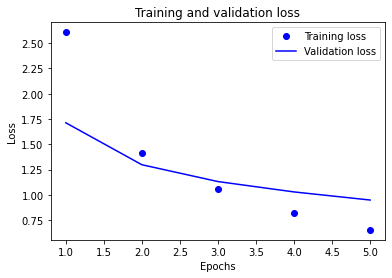

In [107]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

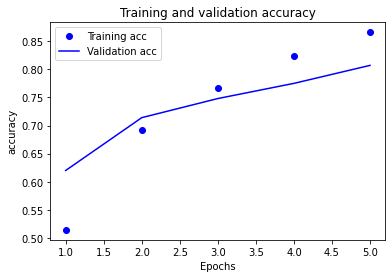

In [108]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [111]:
results = model.evaluate(x_test , one_hot_test_labels)

results

71/71 [==============================] - 0s 2ms/step - loss: 1.0198 - accuracy: 0.7743


[1.019839882850647, 0.7742653489112854]

In [65]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)


0.1745325022261799

In [118]:
predictions = model.predict(x_test)
prediction = np.array(list(map(np.argmax,predictions)))

In [119]:
prediction

array([ 3, 10,  1, ...,  3,  3,  1])